In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install ultralytics opencv-python matplotlib torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/3044_tile_0_0.jpg: 1280x1280 298 object1s, 2 object2s, 2086.5ms
Speed: 19.8ms preprocess, 2086.5ms inference, 3090.3ms postprocess per image at shape (1, 3, 1280, 1280)
Number of boxes: 300
Min conf: 0.0006631513242609799
Max conf: 0.8344386219978333
Number of ground truth boxes: 55
Ground truth class distribution: {1: 1, 0: 54}
TP: 53
FP: 11
FN: 2
TN: ~37 (approximated from 37 background samples)
Total ground truths: 55
Total predictions above threshold: 64

Result Metrics:
Sensitivity and recall: 0.9636 (96.36%)
Precision: 0.8281 (82.81%)
Specificity: 1.0000 (100.00%)
Accuracy: 0.8030 (80.30%)
F1 score: 0.8908 (89.08%

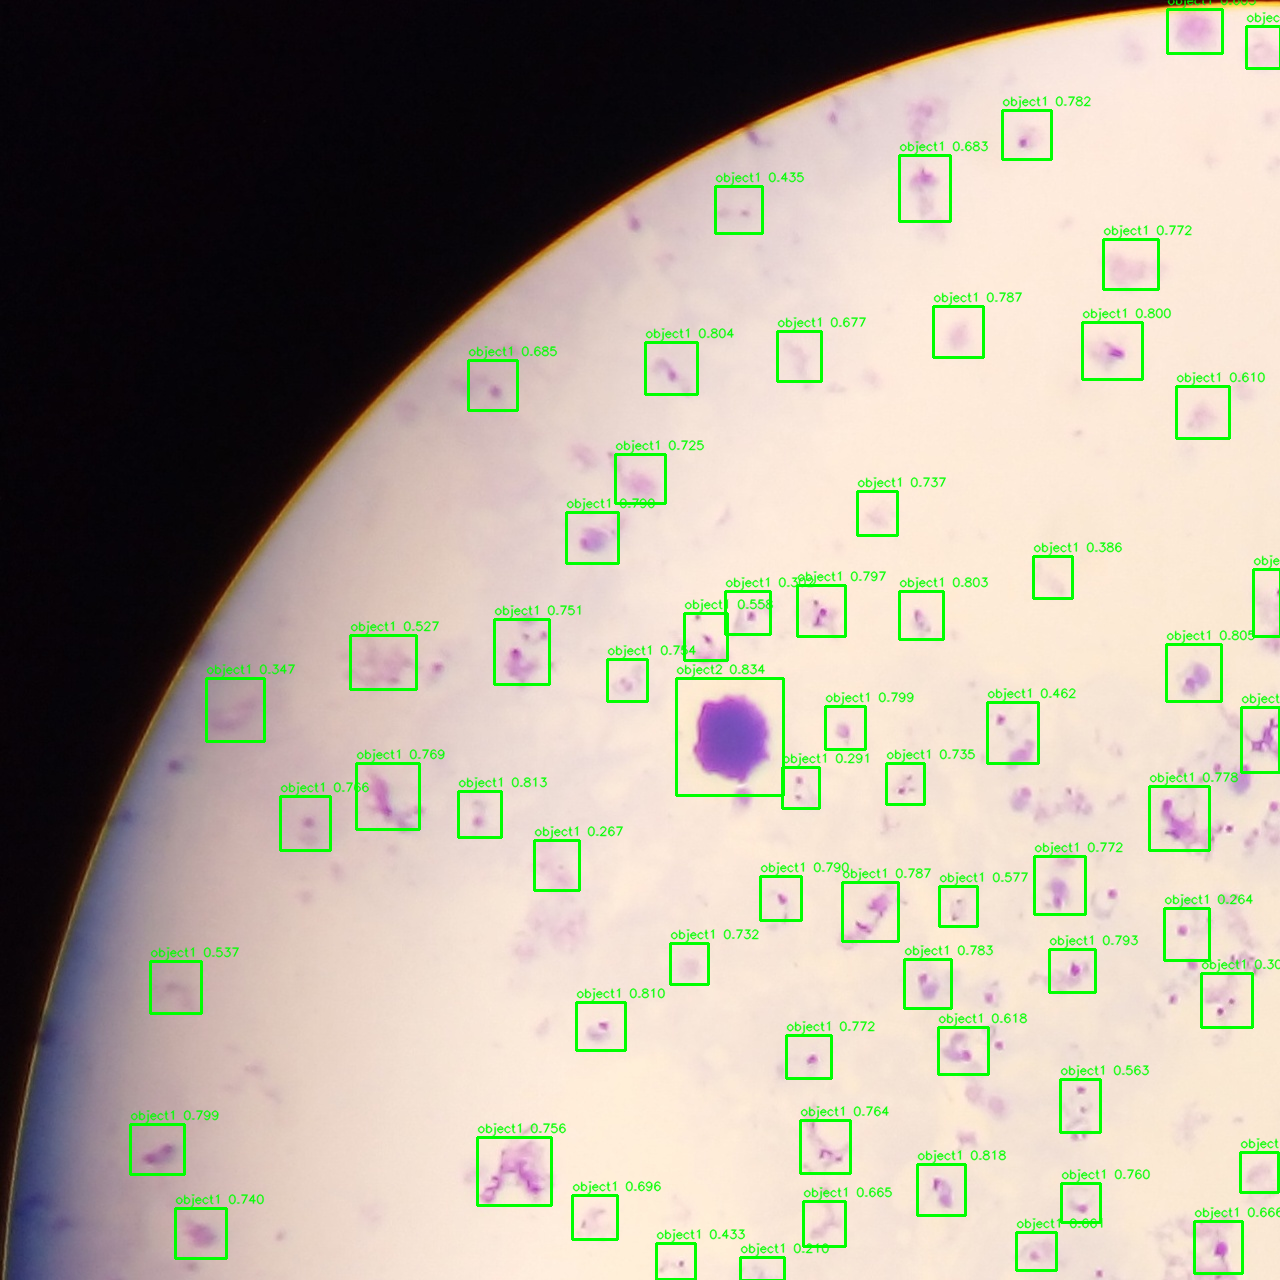

In [7]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

weights_path = "/content/epoch50.pt"
model = YOLO(weights_path)

img_path = "/content/3044_tile_0_0.jpg"
results = model.predict(
    source=img_path,
    conf=0.0,
    iou=0.5,
    imgsz=1280,
    save=False
)

r = results[0]

# confidence range
confs = r.boxes.conf
print("Number of boxes:", len(confs))
print("Min conf:", float(confs.min()))
print("Max conf:", float(confs.max()))

# parse through the ground truth labels
def parse_labels(label_content):
    """
    Parse YOLO format labels from the provided string
    """
    lines = label_content.strip().split('\n')

    gt_boxes = []
    for line in lines:
        if line.strip():
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                gt_boxes.append({
                    'class_id': class_id,
                    'x_center': x_center,
                    'y_center': y_center,
                    'width': width,
                    'height': height
                })
    return gt_boxes

# ground truth labels
label_content = """1 0.571958 0.577372 0.085362 0.096986
0 0.934026 0.523330 0.044226 0.044740
0 0.803310 0.105048 0.043934 0.046126
0 0.870410 0.276030 0.044604 0.044346
0 0.720314 0.481242 0.041768 0.042802
0 0.303178 0.621980 0.054944 0.057348
0 0.472050 0.801048 0.040126 0.037274
0 0.643642 0.475876 0.044280 0.043036
0 0.406040 0.507702 0.047764 0.051932
0 0.828068 0.694052 0.041774 0.041574
0 0.991847 0.472010 0.016306 0.055288
0 0.750016 0.260658 0.040870 0.041214
0 0.950836 0.975586 0.044280 0.045866
0 0.632874 0.827010 0.035402 0.035106
0 0.921642 0.639030 0.050710 0.046696
0 0.526296 0.285666 0.043474 0.044916
0 0.723128 0.138712 0.042140 0.050384
0 0.726338 0.768240 0.040088 0.035414
0 0.984004 0.577302 0.031993 0.047402
0 0.738296 0.929242 0.039232 0.039240
0 0.404958 0.912214 0.058342 0.057878
0 0.611624 0.701340 0.035966 0.037628
0 0.466200 0.418428 0.042878 0.041332
0 0.839574 0.757390 0.041034 0.035590
0 0.705916 0.612974 0.038972 0.035584
0 0.123704 0.895390 0.042468 0.041570
0 0.375724 0.635008 0.039036 0.035866
0 0.941740 0.322946 0.046198 0.045312
0 0.158514 0.962634 0.039840 0.039790
0 0.659070 0.567302 0.037426 0.035354
0 0.682366 0.709842 0.045848 0.046290
0 0.644884 0.890118 0.039080 0.041432
0 0.881272 0.202506 0.044178 0.042604
0 0.239668 0.642542 0.040966 0.040874
0 0.644386 0.958542 0.032874 0.036264
0 0.597720 0.993050 0.037932 0.013901
0 0.792018 0.576840 0.042486 0.051046
0 0.755174 0.822874 0.044658 0.039580
0 0.844972 0.939976 0.034260 0.033716
0 0.688872 0.400194 0.034488 0.037206
0 0.972666 0.750812 0.041214 0.043172
0 0.928194 0.728814 0.040778 0.039644
0 0.468374 0.949306 0.037516 0.032928
0 0.499708 0.376166 0.042922 0.042554
0 0.924094 0.780294 0.042760 0.035502
0 0.950904 0.783644 0.041190 0.035522
0 0.553714 0.505072 0.037784 0.038728
0 0.630376 0.611588 0.032832 0.029488
0 0.384716 0.299772 0.042294 0.042266
0 0.537490 0.751862 0.034814 0.032242
0 0.626376 0.279484 0.037322 0.040360
0 0.845122 0.860472 0.032710 0.035746
0 0.304290 0.515936 0.056208 0.047356
0 0.985589 0.915020 0.028822 0.033384
0 0.749060 0.706480 0.033156 0.032368"""

gt_boxes = parse_labels(label_content)
print(f"Number of ground truth boxes: {len(gt_boxes)}")

# counted by class for more verification
class_counts = {}
for box in gt_boxes:
    class_id = box['class_id']
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

print("Ground truth class distribution:", class_counts)

# convert the from the  YOLO format to pixel coordinates
def yolo_to_pixel(bbox, img_width, img_height):
    """convert YOLO format to pixel coordinates"""
    x_center = bbox['x_center'] * img_width
    y_center = bbox['y_center'] * img_height
    width = bbox['width'] * img_width
    height = bbox['height'] * img_height

    x1 = x_center - width / 2
    y1 = y_center - height / 2
    x2 = x_center + width / 2
    y2 = y_center + height / 2

    return [x1, y1, x2, y2]

# calculate intersection over union
def calculate_iou(box1, box2):
    """get the IoU between the two boxes"""
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2

    # get intersection area
    xi1 = max(x1_1, x1_2)
    yi1 = max(y1_1, y1_2)
    xi2 = min(x2_1, x2_2)
    yi2 = min(y2_1, y2_2)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # get union area
    box1_area = (x2_1 - x1_1) * (y2_1 - y1_1)
    box2_area = (x2_2 - x1_2) * (y2_2 - y1_2)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

# see what the detection performance is
def evaluate_detections(pred_boxes, pred_confs, pred_classes, gt_boxes, iou_threshold=0.5, conf_threshold=0.01):
    """
    evaluate the detection performance with a comparison between predicetd boxes with ground truth boxes
    """
    img_height, img_width = r.orig_img.shape[:2]
    gt_pixel_boxes = [yolo_to_pixel(gt, img_width, img_height) for gt in gt_boxes]

    # filter the predictions using a confidence threshold
    filtered_pred_boxes = []
    filtered_pred_confs = []
    filtered_pred_classes = []

    for box, conf, cls in zip(pred_boxes, pred_confs, pred_classes):
        if conf >= conf_threshold:
            filtered_pred_boxes.append(box.tolist())
            filtered_pred_confs.append(float(conf))
            filtered_pred_classes.append(int(cls))

    # convert pred boxes to pixel coordinates
    pred_pixel_boxes = filtered_pred_boxes

    # start the  counters
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # track which ground truth boxes have gotten matched
    gt_matched = [False] * len(gt_pixel_boxes)

    # find the best matching ground truth box for each prediction
    for pred_box in pred_pixel_boxes:
        best_iou = 0
        best_gt_idx = -1

        for gt_idx, gt_box in enumerate(gt_pixel_boxes):
            if gt_matched[gt_idx]:
                continue

            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = gt_idx

        if best_iou >= iou_threshold:
            true_positives += 1
            gt_matched[best_gt_idx] = True
        else:
            false_positives += 1

    # any unmatched ground truth boxes are counted as false negatives
    false_negatives = len(gt_pixel_boxes) - sum(gt_matched)

    return true_positives, false_positives, false_negatives, filtered_pred_boxes

# specificity calculation for object detection
def calculate_specificity_object_detection(pred_boxes, gt_boxes, img_shape, iou_threshold=0.5):
    """
    calculate the specificity for object detection by sampling the background region.
    """
    img_height, img_width = img_shape[:2]

    # convert the ground truth boxes to pixel coordinates
    gt_pixel_boxes = [yolo_to_pixel(gt, img_width, img_height) for gt in gt_boxes]

    # sample background regions
    background_samples = []
    sample_size = 50

    for _ in range(sample_size):
        # sample random regions and avoid the ground truth areas
        size = np.random.randint(20, 100)
        x1 = np.random.randint(0, img_width - size)
        y1 = np.random.randint(0, img_height - size)
        x2 = x1 + size
        y2 = y1 + size

        # check if this regions overlaps a lot of with any ground truth box
        overlaps = False
        for gt_box in gt_pixel_boxes:
            iou = calculate_iou([x1, y1, x2, y2], gt_box)
            if iou > 0.1:
                overlaps = True
                break

        if not overlaps:
            background_samples.append([x1, y1, x2, y2])

    # count how many background regions are true negatives (meaning they would be correctly not detected)
    true_negatives = 0
    for bg_region in background_samples:
        region_detected = False

        # check if any of the predictions overlap slightly with that background region
        for pred_box in pred_boxes:
            iou = calculate_iou(pred_box, bg_region)
            if iou > iou_threshold:
                region_detected = True
                break

        if not region_detected:
            true_negatives += 1

    specificity = true_negatives / len(background_samples) if background_samples else 0

    return specificity, true_negatives, len(background_samples)

# only draw boxes for low threshold threshold and get the predictions
thr = 0.2

img = r.orig_img.copy()
pred_boxes_above_threshold = []
pred_confs_above_threshold = []
pred_classes_above_threshold = []

for box, conf, cls in zip(r.boxes.xyxy, r.boxes.conf, r.boxes.cls):
    if conf < thr:
        continue

    pred_boxes_above_threshold.append(box)
    pred_confs_above_threshold.append(conf)
    pred_classes_above_threshold.append(cls)

    x1, y1, x2, y2 = box.int().tolist()
    label = f"{model.names[int(cls)]} {float(conf):.3f}"

    # draw rectangle and its label
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(
        img,
        label,
        (x1, max(y1 - 5, 0)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4,
        (0, 255, 0),
        1,
        cv2.LINE_AA
    )

# get metrics
tp, fp, fn, filtered_preds = evaluate_detections(
    r.boxes.xyxy, r.boxes.conf, r.boxes.cls, gt_boxes, conf_threshold=thr
)

# get specificity
specificity, tn, total_bg_samples = calculate_specificity_object_detection(
    [box.tolist() for box in pred_boxes_above_threshold],
    gt_boxes,
    r.orig_img.shape
)

# result  metrics
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
accuracy = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
percent_error = fp / (tp + fp + tn + fn) * 100 if (tp + fp) > 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# print the results
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TN: ~{tn} (approximated from {total_bg_samples} background samples)")
print(f"Total ground truths: {len(gt_boxes)}")
print(f"Total predictions above threshold: {len(pred_boxes_above_threshold)}")

print(f"\nResult Metrics:")
print(f"Sensitivity and recall: {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1 score: {f1_score:.4f} ({f1_score*100:.2f}%)")
print(f"Percent error: {percent_error:.2f}%")


cv2_imshow(img)